# Project 3-By Phanindra Bhushan Chaturvedi

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np

In [4]:
cust=pd.read_csv("C:\\Users\\PHANINDRA BHUSHAN\\Desktop\\project python\\Customer.csv")

In [5]:
prod=pd.read_csv("C:\\Users\\PHANINDRA BHUSHAN\\Desktop\\project python\\prod_cat_info.csv")

In [6]:
trans=pd.read_csv("C:\\Users\\PHANINDRA BHUSHAN\Desktop\\project python\\Transactions.csv")

In [7]:
cust.head(1)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0


In [8]:
prod.head(1)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens


In [9]:
trans.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop


In [10]:
cust.rename(columns={'customer_Id':'cust_id'},inplace=True)

In [11]:
cust.head(1)

,cust_id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0


In [12]:
trans.rename(columns={'prod_subcat_code':'prod_sub_cat_code'},inplace=True)

In [13]:
trans.head(1)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop


1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final.
Ensure to
keep all customers who have done transactions with us and select the join type accordingly.


In [14]:
cust_new=pd.merge(trans,cust,on="cust_id",how ="inner")

In [15]:
cust_final=pd.merge(cust_new,prod,on=("prod_cat_code","prod_sub_cat_code"),how ="inner")

In [16]:
cust_final.shape

(23053, 15)

In [17]:
cust_final.head(1)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,26-09-1981,M,5.0,Clothing,Women


In [18]:
cust_final.duplicated().sum()

13

In [19]:
cust_final.drop_duplicates(inplace=True)

In [20]:
cust_final.duplicated().sum()

0

2. Prepare a summary report for the merged data set.


2.a. Get the column names and their corresponding data types


In [21]:
#column names
cust_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_sub_cat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type', 'DOB',
       'Gender', 'city_code', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [22]:
#datatype
cust_final.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_sub_cat_code      int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_subcat           object
dtype: object

2.b. Top/Bottom 10 observations


In [23]:
#top 10
cust_final.head(10)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,13-10-1986,M,1.0,Clothing,Women
5,4737317330,269345,29-07-2011,1,1,5,1141,599.025,6304.025,MBR,26-06-1970,F,10.0,Clothing,Women
6,44425889101,274987,18-03-2012,1,1,4,897,376.740,3964.740,Flagship store,08-10-1983,M,2.0,Clothing,Women
7,90501340928,271817,19-02-2012,1,1,1,1122,117.810,1239.810,TeleShop,24-12-1989,M,8.0,Clothing,Women
8,99335419136,268755,13-12-2012,1,1,3,1181,372.015,3915.015,e-Shop,15-07-1984,F,8.0,Clothing,Women
9,35030444164,268129,18-11-2011,1,1,5,1047,549.675,5784.675,MBR,07-08-1982,F,9.0,Clothing,Women


In [24]:
#bottom 10
cust_final.tail(10)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
23043,3387244829,269114,15-07-2011,4,4,1,388,40.740,428.740,e-Shop,22-01-1989,F,5.0,Bags,Women
23044,76906459516,267940,15-06-2011,4,4,2,1263,265.230,2791.230,Flagship store,09-06-1979,M,9.0,Bags,Women
23045,73549617163,271334,5/7/2011,4,4,5,263,138.075,1453.075,e-Shop,08-12-1983,F,10.0,Bags,Women
23046,75339646315,274827,2/5/2011,4,4,4,1381,580.020,6104.020,e-Shop,27-12-1988,F,8.0,Bags,Women
23047,6650926717,268110,5/4/2011,4,4,4,1036,435.120,4579.120,MBR,06-03-1976,M,2.0,Bags,Women
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,14-12-1988,F,9.0,Bags,Women
23052,83245680995,273723,26-01-2011,4,4,4,1477,620.340,6528.340,e-Shop,21-01-1984,F,4.0,Bags,Women


2.c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [25]:
cust_final.describe()
#25%=Q1
#75%=Q3
#50%=median

,transaction_id,cust_id,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
count,2.304000e+04,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23040.000000,23032.000000
mean,5.006955e+10,271021.880252,6.148785,3.763498,2.435764,637.094965,248.677488,2109.865226,5.483067
std,2.898062e+10,2431.573668,3.726197,1.677091,2.264326,621.727374,187.188311,2505.610295,2.863331
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,2.493315e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,5.009188e+10,270980.500000,5.000000,4.000000,3.000000,710.000000,199.080000,1756.950000,5.000000
75%,7.532632e+10,273114.250000,10.000000,5.000000,4.000000,1109.000000,365.767500,3570.255000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000


In [27]:
cust_final.describe().loc['min':'max']  #added after submission on portal

,transaction_id,cust_id,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
min,3.268991e+06,266783.00,1.0,1.0,-5.0,-1499.0,7.3500,-8270.925,1.0
25%,2.493315e+10,268935.00,3.0,2.0,1.0,312.0,98.2800,762.450,3.0
50%,5.009188e+10,270980.50,5.0,4.0,3.0,710.0,199.0800,1756.950,5.0
75%,7.532632e+10,273114.25,10.0,5.0,4.0,1109.0,365.7675,3570.255,8.0
max,9.998755e+10,275265.00,12.0,6.0,5.0,1500.0,787.5000,8287.500,10.0


2.d. Frequency tables for all the categorical variables

In [28]:
cust_final.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_sub_cat_code      int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_subcat           object
dtype: object

In [33]:
#changing data type of "DOB"
cust_final["DOB"] = pd.to_datetime(cust_final["DOB"])

In [34]:
cust_final.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_sub_cat_code             int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
prod_cat                     object
prod_subcat                  object
dtype: object

In [35]:
#changing data type of "tran_date"
cust_final["tran_date"] = pd.to_datetime(cust_final["tran_date"])

In [37]:
x=(cust_final.select_dtypes(include=['object'])) #object data type is categorical 
x.describe()

,Store_type,Gender,prod_cat,prod_subcat
count,23040,23031,23040,23040
unique,4,2,6,18
top,e-Shop,M,Books,Women
freq,9304,11804,6066,3046


3. Generate histograms for all continuous variables and frequency bars for categorical variables

In [38]:
#continous_variable=
(cust_final.select_dtypes(include=['number'])).columns

Index(['transaction_id', 'cust_id', 'prod_sub_cat_code', 'prod_cat_code',
       'Qty', 'Rate', 'Tax', 'total_amt', 'city_code'],
      dtype='object')

In [39]:
#categorical variable=
(cust_final.select_dtypes(include=['object'])).columns

Index(['Store_type', 'Gender', 'prod_cat', 'prod_subcat'], dtype='object')

In [40]:
conti_variable = cust_final.loc[:,['prod_sub_cat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]
#excluding transaction_id and cust_id

In [41]:
conti_variable.columns

Index(['prod_sub_cat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax',
       'total_amt'],
      dtype='object')

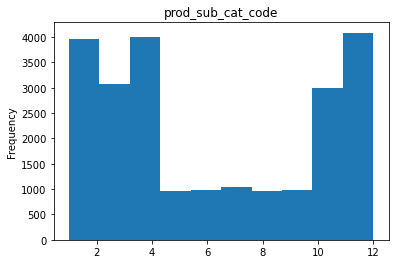

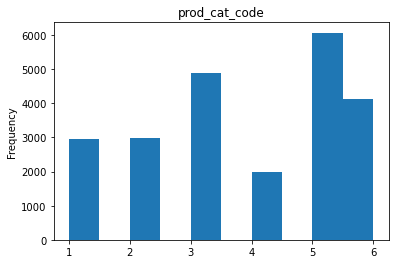

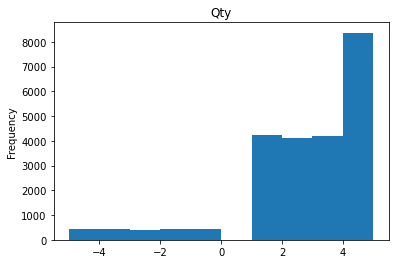

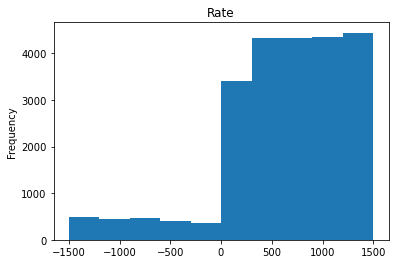

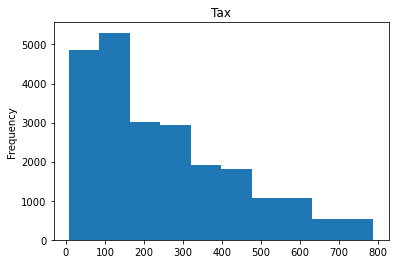

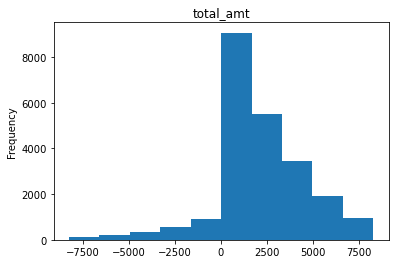

In [42]:
for var in conti_variable.columns:
    conti_variable[var].plot(kind='hist')
    plt.title(var)
    plt.show()

In [43]:
category_variable = cust_final.loc[:,cust_final.dtypes=='object']

In [44]:
category_variable.columns

Index(['Store_type', 'Gender', 'prod_cat', 'prod_subcat'], dtype='object')

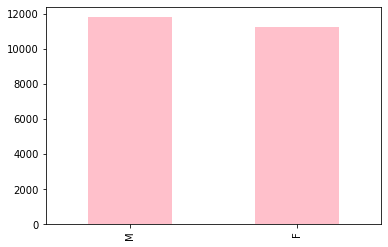

In [45]:
cust_final['Gender'].value_counts().plot(kind='bar',color="pink");

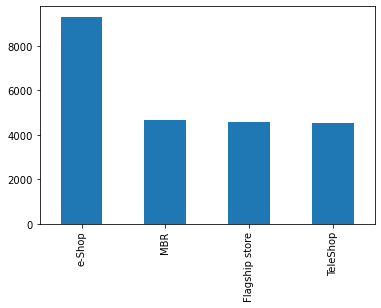

In [46]:
cust_final['Store_type'].value_counts().plot(kind='bar');

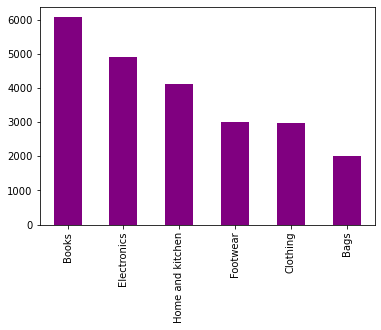

In [47]:
cust_final['prod_cat'].value_counts().plot(kind='bar',color="purple");

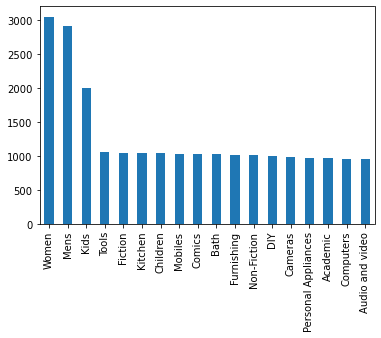

In [48]:
cust_final['prod_subcat'].value_counts().plot(kind='bar');

4. Calculate the following information using the merged dataset :


4.a. Time period of the available transaction data

In [49]:
Start_date = cust_final["tran_date"].min()

In [50]:
End_date = cust_final["tran_date"].max()

In [51]:
End_date

Timestamp('2014-12-02 00:00:00')

In [52]:
Start_date

Timestamp('2011-01-02 00:00:00')

In [53]:
duration=End_date-Start_date

In [54]:
duration

Timedelta('1430 days 00:00:00')

#Time period of available transaction data
startdate=02/01/2011
endDate=02/12/2014
thus duration is 1430 days

4.b. Count of transactions where the total amount of transaction was negative


In [55]:
cust_final.loc[cust_final["total_amt"] < 0,"transaction_id"].count()

2164

5. Analyze which product categories are more popular among females vs male customers.

In [56]:
Popular_products = cust_final.groupby(["Gender","prod_cat"])[["Qty"]].sum()

In [60]:
Popular_products

Qty
Gender prod_cat              
F      Bags              2364
       Books             7080
       Clothing          3425
       Electronics       5832
       Footwear          3721
       Home and kitchen  4898
M      Bags              2346
       Books             7587
       Clothing          3748
       Electronics       6486
       Footwear          3561
       Home and kitchen  5051

<AxesSubplot:xlabel='Gender,prod_cat'>

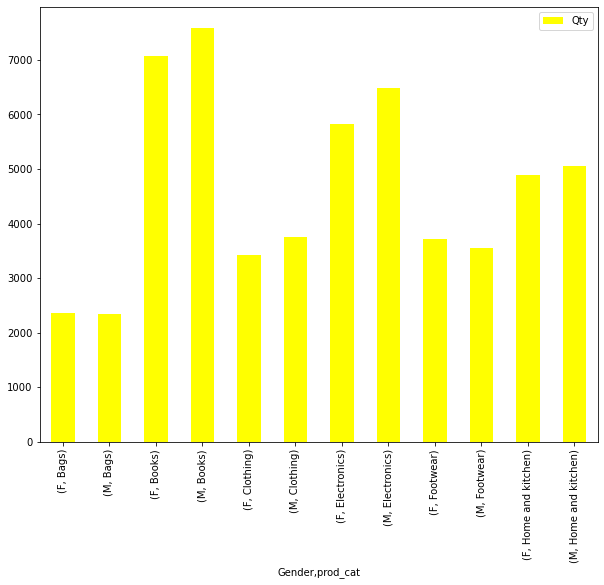

In [61]:
(Popular_products.sort_values(by=["prod_cat"])).plot(kind="bar",color=("yellow"),figsize=(10,8))

#popular products in men are
Books
Clothing
Electronics
Home and Kitchen
#popular products in women are
Bags
Footwear

6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [71]:
cty_max = cust_final.groupby(["city_code"])["cust_id"].count().sort_values(ascending = False)
cty_max

city_code
4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: cust_id, dtype: int64

Text(0, 0.5, 'Count of customer Id')

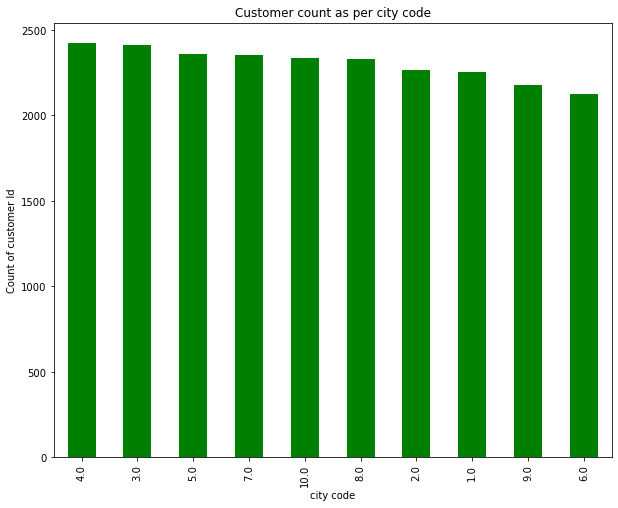

In [72]:
cty_max.plot(kind="bar",color="green",figsize=(10,8))
plt.title("Customer count as per city code")
plt.xlabel("city code")
plt.ylabel("Count of customer Id")

In [73]:
round((cty_max[4.0]/cty_max.sum())*100,2)

10.52

# 10.52% customer are from city code 4

7. Which store type sells the maximum products by value and by quantity?


In [74]:
store_max_quantity=cust_final.groupby(["Store_type"])["Qty"].sum()

In [75]:
store_max_quantity

Store_type
Flagship store    11142
MBR               11195
TeleShop          10993
e-Shop            22790
Name: Qty, dtype: int64

Text(0, 0.5, 'QUANTITY')

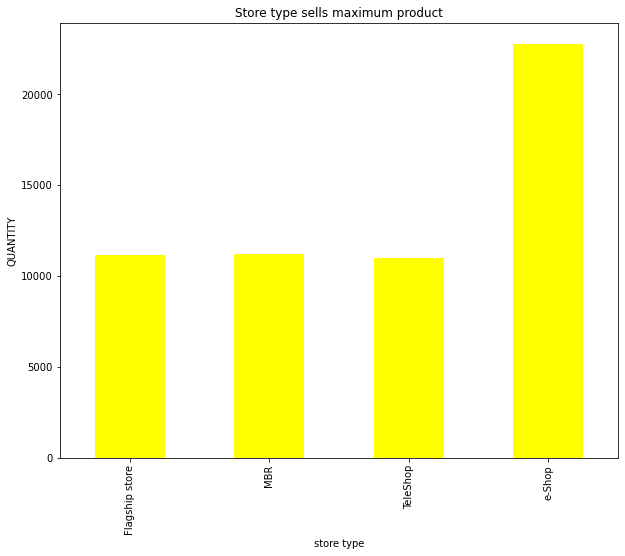

In [76]:
store_max_quantity.plot(kind="bar",color="yellow",figsize=(10,8))
plt.title("Store type sells maximum product")
plt.xlabel("store type")
plt.ylabel("QUANTITY")

In [77]:
store_max_value=cust_final.groupby(["Store_type"])["total_amt"].sum()

In [78]:
store_max_value

Store_type
Flagship store    9.721597e+06
MBR               9.674941e+06
TeleShop          9.372134e+06
e-Shop            1.984262e+07
Name: total_amt, dtype: float64

Text(0, 0.5, 'Total Amount')

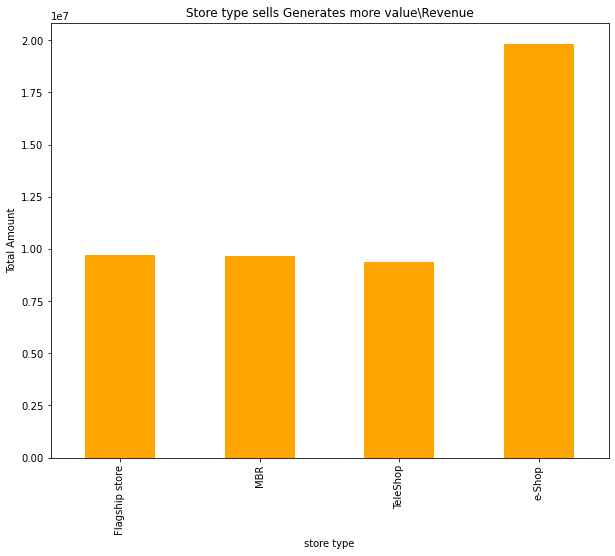

In [79]:
store_max_value.plot(kind="bar",color="orange",figsize=(10,8))
plt.title("Store type sells Generates more value\Revenue")
plt.xlabel("store type")
plt.ylabel("Total Amount")

#e-shop sells maximum product by quantity as well value

8. What was the total amount earned from the "Electronics" and "Clothing" categories from
Flagship Stores?


In [80]:
flagship_amt = cust_final.groupby(["Store_type","prod_cat"])[["total_amt"]].sum()

In [81]:
flagship_amt

total_amt
Store_type     prod_cat                     
Flagship store Bags               870548.835
               Books             2493677.810
               Clothing          1194423.230
               Electronics       2215136.040
               Footwear          1234806.560
               Home and kitchen  1713004.150
MBR            Bags               848678.675
               Books             2496039.195
               Clothing          1287686.335
               Electronics       2107969.825
               Footwear          1112163.715
               Home and kitchen  1822403.570
TeleShop       Bags               789181.055
               Books             2545714.470
               Clothing          1241834.360
               Electronics       1978457.195
               Footwear          1235719.290
               Home and kitchen  1581227.375
e-Shop         Bags              1617933.265
               Books             5297161.155
               Clothing          2527193.565
               Electronics       4429142.770
               Footwear          2643215.250
               Home and kitchen  3327977.120

In [82]:
flag_Store_group = round(cust_final.pivot_table(index = "prod_cat", columns = "Store_type", values = "total_amt",  aggfunc = "sum"),2)
flag_Store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.84,848678.68,789181.06,1617933.26
Books,2493677.81,2496039.19,2545714.47,5297161.16
Clothing,1194423.23,1287686.34,1241834.36,2527193.56
Electronics,2215136.04,2107969.83,1978457.20,4429142.77
Footwear,1234806.56,1112163.72,1235719.29,2643215.25
Home and kitchen,1713004.15,1822403.57,1581227.38,3327977.12


In [83]:
Total_amt = flag_Store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()
Total_amt

3409559.27

9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [84]:
gender_earn = round(cust_final.pivot_table(index = "prod_cat", columns = "Gender", values = "total_amt",  aggfunc = "sum"),2)
gender_earn

Gender,F,M
prod_cat,,
Bags,2079618.84,2046722.99
Books,6174590.82,6645972.78
Clothing,3026750.80,3224079.50
Electronics,5019354.21,5711351.62
Footwear,3203155.22,3020200.36
Home and kitchen,4133702.24,4305169.50


Text(0, 0.5, 'Total Amount(in multiple 10^6)')

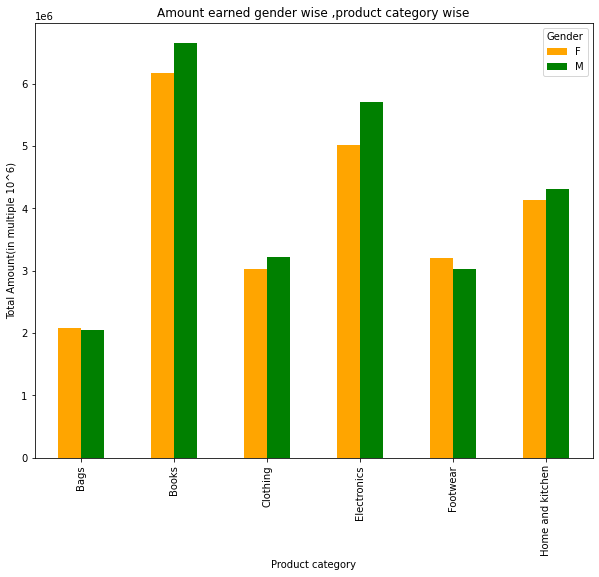

In [85]:
gender_earn.plot(kind="bar",color=("orange","green"),figsize=(10,8))
plt.title("Amount earned gender wise ,product category wise")
plt.xlabel("Product category")
plt.ylabel("Total Amount(in multiple 10^6)")

In [86]:
Male_earn = gender_earn.loc["Electronics","M"].sum()
Male_earn

5711351.62

10. How many customers have more than 10 unique transactions, after removing all
transactions which have any negative amounts?


In [87]:
nonNeg_Trans= cust_final.loc[cust_final["total_amt"]>0,:]
nonNeg_Trans

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women
2,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,1981-06-08,M,3.0,Clothing,Women
4,92814475704,267750,2013-07-08,1,1,4,284,119.280,1255.280,Flagship store,1986-10-13,M,1.0,Clothing,Women
5,4737317330,269345,2011-07-29,1,1,5,1141,599.025,6304.025,MBR,1970-06-26,F,10.0,Clothing,Women
6,44425889101,274987,2012-03-18,1,1,4,897,376.740,3964.740,Flagship store,1983-10-08,M,2.0,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,2011-09-04,4,4,5,788,413.700,4353.700,Flagship store,1973-10-15,F,6.0,Bags,Women
23049,5618131425,272010,2011-03-03,4,4,2,1150,241.500,2541.500,MBR,1972-12-22,F,5.0,Bags,Women
23050,18727956164,267161,2011-02-23,4,4,5,668,350.700,3690.700,e-Shop,1981-05-08,M,9.0,Bags,Women
23051,60416814232,273281,2011-02-18,4,4,4,202,84.840,892.840,Flagship store,1988-12-14,F,9.0,Bags,Women


In [94]:
Unique_Trans = nonNeg_Trans.groupby(["cust_id","prod_cat","prod_subcat"])["transaction_id"].count().reset_index()
Unique_Trans


,cust_id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [90]:
Unique_trans_count = Unique_Trans.groupby("cust_id")["transaction_id"].count().reset_index()
Unique_trans_count

,cust_id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8
...,...,...
5501,275257,4
5502,275261,3
5503,275262,2
5504,275264,2


In [95]:
Unique_trans_count[Unique_trans_count["transaction_id"]>10]

,cust_id,transaction_id


11. For all customers aged between 25 - 35, find out:


a. What was the total amount spent for “Electronics” and “Books” product categories?


In [99]:
#create a new column Age in years
now = pd.Timestamp('now')
cust_final['DOB'] = pd.to_datetime(cust_final['DOB'], format='%m%d%y')    
cust_final['DOB'] = cust_final['DOB'].where(cust_final['DOB'] < now, cust_final['DOB'] -np.timedelta64(1, 'Y')) 
cust_final['AGE'] = (now - cust_final['DOB']).astype('<m8[Y]')

#astype('<m8[Y]') -gives age in year else without it we will get only number of days
#timedelta64 is used to represent the number of units, and a date/time unit,
#timedelta64[1,'y'] maps to  <M8['y']

In [100]:
cust_final.head(1)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat,AGE
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,1981-09-26,M,5.0,Clothing,Women,40.0


In [101]:
cust_final['AGE'].unique()

array([40., 35., 51., 38., 32., 37., 39., 50., 44., 46., 33., 34., 48.,
       30., 43., 31., 36., 45., 42., 49., 47., 29., 41., 52.])

In [102]:
#create new coumn Age_cat
cust_final['Age_cat'] = pd.cut(cust_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

In [103]:
cust_final.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat,AGE,Age_cat
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women,40.0,36-46
1,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,1981-09-26,M,5.0,Clothing,Women,40.0,36-46
2,18505840838,271509,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,1981-06-08,M,3.0,Clothing,Women,40.0,36-46
3,92814475704,267750,2013-08-16,1,1,-4,-284,119.280,-1255.280,Flagship store,1986-10-13,M,1.0,Clothing,Women,35.0,25-35
4,92814475704,267750,2013-07-08,1,1,4,284,119.280,1255.280,Flagship store,1986-10-13,M,1.0,Clothing,Women,35.0,25-35


In [104]:
Year_25_35 = cust_final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()

In [105]:
Year_25_35

Age_cat  prod_cat        
25-35    Bags                1154423.335
         Books               3482813.035
         Clothing            1985409.855
         Electronics         3192596.940
         Footwear            1899481.740
         Home and kitchen    2488947.305
36-46    Bags                1943546.930
         Books               6367606.700
         Clothing            2938118.755
         Electronics         4980404.065
         Footwear            2894842.535
         Home and kitchen    4091348.690
47-57    Bags                1028371.565
         Books               2982172.895
         Clothing            1327608.880
         Electronics         2557704.825
         Footwear            1431580.540
         Home and kitchen    1864316.220
Name: total_amt, dtype: float64

In [106]:
Year_25_35.loc['25-35',['Books','Electronics']]

Age_cat  prod_cat   
25-35    Books          3482813.035
         Electronics    3192596.940
Name: total_amt, dtype: float64

In [107]:
Year_25_35.loc['25-35',['Books','Electronics']].sum().round(2)

6675409.98

b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar,
2014?

In [90]:
customer_total_amount_25_35 = cust_final[cust_final['Age_cat']=='25-35']
customer_total_amount_25_35.head()

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat,AGE,Age_cat
3,92814475704,267750,2013-08-16,1,1,-4,-284,119.28,-1255.28,Flagship store,1986-10-13,M,1.0,Clothing,Women,35.0,25-35
4,92814475704,267750,2013-07-08,1,1,4,284,119.28,1255.28,Flagship store,1986-10-13,M,1.0,Clothing,Women,35.0,25-35
7,90501340928,271817,2012-02-19,1,1,1,1122,117.81,1239.81,TeleShop,1989-12-24,M,8.0,Clothing,Women,32.0,25-35
11,90954125896,269387,2013-03-18,1,1,4,839,352.38,3708.38,MBR,1990-02-03,F,10.0,Clothing,Women,32.0,25-35
17,11999444239,268052,2012-06-18,1,1,2,1324,278.04,2926.04,Flagship store,1988-12-18,M,7.0,Clothing,Women,33.0,25-35


In [91]:
total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') & (customer_total_amount_25_35['tran_date'] <='2014-03-01')]

In [92]:
total_amount

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat,AGE,Age_cat
20,73713102191,268867,2014-02-15,1,1,1,714,74.970,788.970,MBR,1987-10-24,F,4.0,Clothing,Women,34.0,25-35
23,57134739558,270625,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,1992-02-03,M,6.0,Clothing,Women,30.0,25-35
38,64939234724,270240,2014-01-29,1,1,4,644,270.480,2846.480,e-Shop,1988-12-07,M,1.0,Clothing,Women,33.0,25-35
45,65582112405,267243,2014-01-29,1,1,3,1259,396.585,4173.585,e-Shop,1990-03-19,F,6.0,Clothing,Women,32.0,25-35
63,87461360026,270831,2014-01-15,1,1,2,871,182.910,1924.910,Flagship store,1986-11-10,F,6.0,Clothing,Women,35.0,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22198,60990415403,272399,2014-01-13,4,4,2,581,122.010,1284.010,Flagship store,1986-06-12,F,5.0,Bags,Women,35.0,25-35
22199,47691273998,272059,2014-01-15,4,4,4,146,61.320,645.320,Flagship store,1991-07-22,F,6.0,Bags,Women,30.0,25-35
22204,38702596038,274594,2014-01-14,4,4,5,815,427.875,4502.875,e-Shop,1989-01-21,M,5.0,Bags,Women,33.0,25-35
22206,69724469724,271352,2014-01-14,4,4,1,861,90.405,951.405,MBR,1992-07-18,M,8.0,Bags,Women,29.0,25-35


In [94]:
 total_amount['total_amt'].sum()

456079.91

In [95]:
print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is ',total_amount['total_amt'].sum())

The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is  456079.91
